In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter

## Part 1

## 1a)
Read the data provided on canvas into Python as follows: place csv files into pandas dataframes

In [2]:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

In [3]:
delivery_train.head(5)

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [4]:
delivery_test.head(5)

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [5]:
student_train.head(5)

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [6]:
student_test.head(5)

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


### 1b) 
Split the data into taining and test set

In [7]:
#Splitting delivery train
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train[["Time"]]

#Splitting the delivery test
X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test[["Time"]]

#Splitting the student train
X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train[["Dropped"]]

#Splitting the student test
X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test[["Dropped"]]

In [8]:
#Shape of delivery train
print(X_delivery_train.shape)
print(y_delivery_train.shape)
print()

#Shape of delivery test
print(X_delivery_test.shape)
print(y_delivery_test.shape)
print()

#Shape of student train
print(X_student_train.shape)
print(y_student_train.shape)
print()

#Shape of student test
print(X_student_test.shape)
print(y_student_test.shape)

(199, 2)
(199, 1)

(101, 2)
(101, 1)

(400, 2)
(400, 1)

(100, 2)
(100, 1)


### 1c) 
Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:
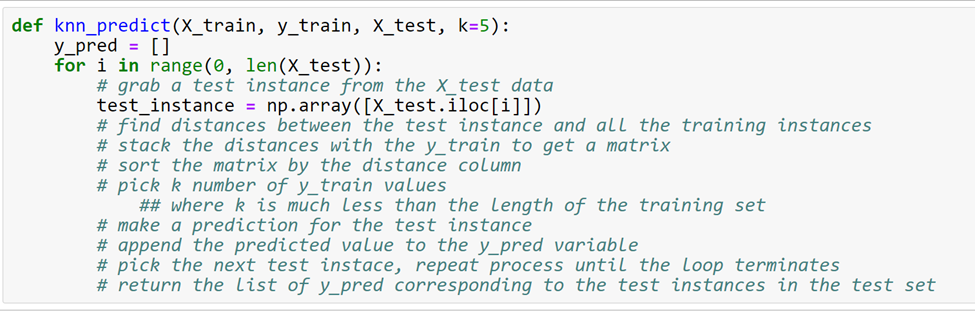
You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. 

In [9]:
def knn_predict(X_train, y_train, X_test, k =5):
    y_pred = []
    
    for i in range(0, len(X_test)):
        # extract a test instance from the X_test data
        test_instance = np.array([X_test.iloc[i]])

        #find the distances between the test instance and all the training instances
        d = euclidean_distances(X_train, test_instance)

        #stack the distances between the test 
        stacked = np.stack((d.flatten(), y_train.Time.values), axis = 1)
        
        #finding the y_train values for the nearest k-neighbors
        y_train_nearest_k = stacked[np.argsort(stacked[:,0])][0:k, 0]
        y_train_nearest_k
        
        # make a prediction for the test instanced
        predicted_y = np.mean(y_train_nearest_k)
        
        # appening y_pred
        y_pred.append(predicted_y)
        
    return y_pred

In [10]:
test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test) 

### 1d)
Writing your own MSE function

In [11]:
def mse(y_arr, y_arr_pred):
    mse = 0
    for i in range(len(y_arr)):
        mse += ((y_arr[i]-y_arr_pred[i])**2)
    mse = mse/len(y_arr)
    return mse
    #return np.square(np.subtract(y_delivery_test, y_delivery_test_pred)).mean()

### 1e) 
Does your algorithm overfit the data? 

In [12]:
mse(np.array(y_delivery_test), np.array(test_pred))

array([51.7429703])

In [13]:
# Train set MSE

In [14]:
test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train) 
mse(np.array(y_delivery_train), np.array(test_pred))

array([49.27788945])

I obtained a slightly smaller MSE for the training set, which is an indication that the training set is doing a better job at fitting the data. This means our algorithm is overfitting.

### 1f)
Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Plot the training and test error rates of the model versus the grid of hyperparameter values. 

In [15]:
k_test = []
k_train = []
for k in range(1, 51):
    k_train.append(mse(np.array(y_delivery_train), 
                       np.array(knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k)))[0])
    k_test.append(mse(np.array(y_delivery_test), 
                      np.array(knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k)))[0])

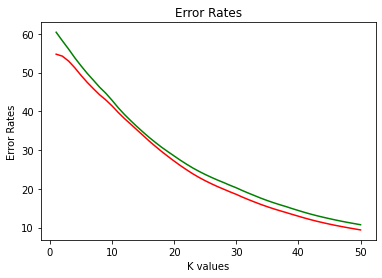

In [16]:
plt.plot(range(1, 51), k_train , color = 'red', label = 'Train')
plt.plot(range(1, 51), k_test, color = 'green', label = 'Test')
plt.title('Error Rates')
plt.ylabel('Error Rates')
plt.xlabel('K values')
plt.show()

### 1g)
Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this similar to the mse value you got from the algorithm function you wrote from scratch? 

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [19]:
knr = KNeighborsRegressor()
knr.fit(X_delivery_train, y_delivery_train)
preds = knr.predict(X_delivery_test)
mean_squared_error(y_delivery_test, preds)

1.142752475247525

This answer is not similar to the same answer I got in my contsructed mse for the test set. The MSE I obtained for that was large, 51.7429703, not 1.1475

### 1h)

Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the pipeline object to fit the model into the delivery training data. Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
pipe = Pipeline([('stanscalar', StandardScaler()), ('knr', KNeighborsRegressor())])
pipe.steps

[('stanscalar', StandardScaler()), ('knr', KNeighborsRegressor())]

In [22]:
pipe.fit(X_delivery_train, y_delivery_train)
pipe_test = pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, pipe_test)

1.0299128712871293

It is somewhat similar to the unscalled input in g, however the MSE is much lower indicating that it is a better model with the scaled data.

### 1i)
i)	Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model. Is this mse similar to the one you got in question (h) above? 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
pipe = Pipeline([('stanscalar', StandardScaler()), ('rfr', RandomForestRegressor())])
pipe.steps

[('stanscalar', StandardScaler()), ('rfr', RandomForestRegressor())]

In [25]:
pipe.fit(X_delivery_train, y_delivery_train.values.ravel())
pipe_test = pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, pipe_test)

0.9638844867667695

It was a little bit lower than the MSE obtained in 1h, indicating that a RandomForestRegressor is a better model since we have a lower mean squared error. 

## Question 2

### 2a)
You would use the student data for classification: that is, GPA and Age would be used as input to predict wither a student will drop out of school (Dropped=1) or not drop (Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1. 

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:

In [26]:
def knn_predict2(X_train, y_train, X_test, k =5):
    y_pred = []
    
    for i in range(0, len(X_test)):
        # extract a test instance from the X_test data
        test_instance = np.array([X_test.iloc[i]])
        
        d = []
        for j in range(0, len(X_train)):
            #find the distances between the test instance and all the training instances
            d.append(euclidean_distances(test_instance, np.array([X_train.iloc[j]])))
        
        # create dataframe
        dist = pd.DataFrame((np.array(d).reshape(400,1)), columns = ['distance'], index = y_train.index)
        
        # Sort by the distance column, pick k number of y_train values, where k is much less than the length of the training set
        distdf = dist.sort_values(by=['distance'], axis=0)[:k]
        
        # Counter creation on the train set
        counter = Counter(y_train.iloc[distdf.index[0]])
        for l in range(0, len(distdf)):
            counter.update(y_train.iloc[l+1])

        #finding the y_train values for the nearest k-neighbors and append to prediction
        y_pred.append(counter.most_common()[0][0])
        
    return np.array(y_pred)

In [27]:
scaler = StandardScaler()
scaler.fit(X_student_train)
X_student_scl_train = scaler.transform(X_student_train)
X_student_scl_train = pd.DataFrame(X_student_scl_train)

# 
scaler.fit(X_student_test)
X_student_scl_test = scaler.transform(X_student_test)
X_student_scl_test = pd.DataFrame(X_student_scl_test)

In [28]:
test_pred = knn_predict2(X_student_scl_train, y_student_train, X_student_scl_test) 
train_pred = knn_predict2(X_student_scl_train, y_student_train, X_student_scl_train) 

### 2b)
Define an accuracy function for the overall accuracy of your algorithm.

In [29]:
def overall_acc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [30]:
# accuracy of the test predictions
overall_acc(np.array(y_student_test), np.array(test_pred))

0.5918

In [31]:
# accuracy of the training predictions
overall_acc(np.array(y_student_train), np.array(train_pred))

0.5903125

### 2c)
Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set. Is this accuracy score similar to that obtained using your knn algorithm from scratch?

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#looking at n_neighbors from 1-50 odd numbers
new_params = {'n_neighbors': range(1,51)}
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = new_params, scoring="accuracy")
grid_knn.fit(X_student_scl_train, y_student_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')

In [33]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [34]:
new_knn = grid_knn.best_estimator_
new_knn.fit(X_student_scl_train, y_student_train.values.ravel())
new_pred = new_knn.predict(X_student_scl_test)

In [35]:
overall_acc(np.array(y_student_test), np.array(new_pred))

0.6998

No, this accuracy score is a little higher than our built model. In this, we have an accuracy score of 0.6998 with the best estimator being n_neighbors = 19. Our accuracy in 2b was 0.592 for the test set.

### 2d)
Also build another model using a random forest classifier and compute the accuracy score on the test set. Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_student_scl_train, y_student_train.values.ravel())
y_test_pred = rfc.predict(X_student_scl_test)
print(rfc)
#Accuracy
print(f"Accuracy: {rfc.score(X_student_scl_test, y_student_test.values.ravel())}")

RandomForestClassifier(random_state=42)
Accuracy: 0.66


According to the accuracy obtained from the RandomForestClassifier, the KNN model is still the best since it has an accuracy of 0.6998, while the Random Forest model has an accuracy of 0.65.

## Question 3

Find your own dataset suitable for classification or regression with at least three input variables and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting unique dataset that is not popularly used in the internet. 

### a) 
State your research question: Utilizing the Pima Diabetes dataset, will the RandomForest Classifier, DecisionTreeClassifier, or the K-NearestNeighborClassifier be the better model to predict whether a Pima woman will have diabetes or not.  

Dataset taken from https://vincentarelbundock.github.io/Rdatasets/articles/data.html

### b)
Data Pre-Processing

In [38]:
diabetes = pd.read_csv("Pima.te.csv", skipinitialspace=True)
diabetes.head(5)

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [39]:
diabetes.drop(columns=['Unnamed: 0'], inplace = True)

In [40]:
# check for null values
diabetes.isnull().sum()

npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64

In [41]:
diabetes.replace( ['NA', 'nan'], np.nan, inplace=True)

In [42]:
diabetes.isna().sum()

npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64

In [43]:
diabetes.isnull().sum()

npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64

In [44]:
# converting the target variable yes/no to binary
diabetes['type']= diabetes['type'].map({'Yes': 1, 'No':0})

In [45]:
# scale continuous variables using min-max
for i in ['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age']:
    maxn = max(diabetes[i])
    minn = min(diabetes[i])
    for j in range(len(diabetes)):
        x = diabetes.loc[j, i]
        diabetes.at[j, i] = (x-minn)/(maxn-minn)

In [46]:
diabetes.head(5)

,npreg,glu,bp,skin,bmi,ped,age,type
0,0.352941,0.628788,0.558140,0.500000,0.297694,0.232120,0.483333,1
1,0.058824,0.151515,0.488372,0.392857,0.150943,0.113919,0.166667,0
2,0.058824,0.181818,0.488372,0.285714,0.182390,0.035118,0.000000,0
3,0.176471,0.098485,0.302326,0.446429,0.243187,0.069807,0.083333,1
4,0.117647,1.000000,0.534884,0.678571,0.232704,0.031263,0.533333,1


In [47]:
diabetes.describe()

,npreg,glu,bp,skin,bmi,ped,age,type
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.204996,0.411053,0.554112,0.395762,0.290142,0.189888,0.171938,0.328313
std,0.193155,0.231069,0.148829,0.174073,0.152681,0.155579,0.177270,0.470308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.234848,0.465116,0.267857,0.183962,0.077516,0.033333,0.000000
50%,0.117647,0.356061,0.558140,0.392857,0.283019,0.152034,0.100000,0.000000
75%,0.294118,0.539773,0.651163,0.517857,0.373166,0.254497,0.266667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### c)
Data Splitting:

Utilizing the Type variable as the target and then the others as the predictors.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = diabetes['type']
X = diabetes.drop('type', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
X_train.head(5)

,npreg,glu,bp,skin,bmi,ped,age
22,0.117647,0.045455,0.534884,0.357143,0.180294,0.214561,0.016667
283,0.117647,0.681818,0.325581,0.357143,0.404612,0.066381,0.066667
315,0.117647,0.257576,0.418605,0.178571,0.360587,0.157602,0.000000
56,0.058824,0.174242,0.069767,0.625000,0.746331,0.176017,0.083333
219,0.235294,0.257576,0.511628,0.553571,0.280922,0.025696,0.200000


In [51]:
X_test.head(5)

,npreg,glu,bp,skin,bmi,ped,age
25,0.294118,0.174242,0.488372,0.250000,0.104822,0.110064,0.150000
317,0.176471,0.280303,0.232558,0.232143,0.238994,0.134904,0.083333
73,0.411765,0.280303,0.581395,0.589286,0.373166,0.050964,0.400000
193,0.058824,0.113636,0.581395,0.071429,0.222222,0.189293,0.016667
57,0.058824,0.393939,0.744186,0.303571,0.316562,0.136188,0.316667


In [52]:
y_train.head(5)

22     0
283    1
315    0
56     1
219    0
Name: type, dtype: int64

In [53]:
y_test.head(5)

25     0
317    0
73     0
193    0
57     1
Name: type, dtype: int64

### d)
Model Consturction

We will be looking at both the DecsionTreeClassifier, RandomForestClassifier, and KNN Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score 

In [55]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
print(dtc)
#Accuracy
print(f"Accuracy: {dtc.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, y_test_pred)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print()

# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
print(rfc)
#Accuracy
print(f"Accuracy: {rfc.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, y_test_pred)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print()

# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print(knn)
#Accuracy
print(f"Accuracy: {knn.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, y_test_pred)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print()

DecisionTreeClassifier()
Accuracy: 0.7
Overall Error: 0.30000000000000004
F1 Score: 0.6052631578947368
Confusion Matrix
[[47 10]
 [20 23]]

RandomForestClassifier()
Accuracy: 0.72
Overall Error: 0.28
F1 Score: 0.6111111111111112
Confusion Matrix
[[50  7]
 [21 22]]

KNeighborsClassifier()
Accuracy: 0.69
Overall Error: 0.31000000000000005
F1 Score: 0.5373134328358209
Confusion Matrix
[[51  6]
 [25 18]]



Looking at the accuracy of the two models, we see that the RandomForestClassifier has the higher accuracy and lower overall prediction error rate, with KNeighborsClassifier being next, and then DecisionTreeClassifier being the worst. Also, because we are looking at whether a Pima Indian Woman will have diabetes or not, the false positives and false negatives are important. Therefore we looked at the F1 Score. This also showed that the RandomForestClassifier was the better model as it had a higher F1 score, but KNeighborsClassifier had the lowest F1 score. 

## e)
Hyperparameter tuning

#### Hyperparamter tuning for Decision Tree Classifier

In [56]:
# Finding the optimal max_depth utilizing Grid Search
dtc_max = dtc.tree_.max_depth

In [57]:
# Printing parameters of my RandomForestRegressor model that was trained.
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [58]:
# utilized the f1 scoring to determing the max depth and max features, since the best f1 will be the best model. 

new_params = {'max_depth':range(1,(dtc.tree_.max_depth)), 'max_features':[0.2,0.4,0.6,0.8]}
dtc_grid = GridSearchCV(estimator = dtc, param_grid = new_params, cv=8, scoring = "f1")
dtc_grid.fit(X_train, y_train)

print(dtc_grid.best_estimator_)

DecisionTreeClassifier(max_depth=9, max_features=0.6)


#### Hyperparameter Tuning of Random Forest Classifier

In [59]:
# Printing parameters of my RandomForestRegressor model that was trained.
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
# utilized the f1 scoring to determing the max depth and max features, since the best f1 will be the best model.  

new_params = {'max_depth':range(1,(dtc.tree_.max_depth)), 'max_features':[0.2,0.4,0.6,0.8]}
rfc_grid = GridSearchCV(estimator = rfc, param_grid = new_params, cv=8, scoring = "f1")
rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=0.8)


#### Hyperparameter Tuning of KNeighborsClassifier

In [61]:
# Printing parameters of my KNeighborsClassifier model that was trained.
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
# looking through 1-50 n_neighbors scoring to determing the   
new_params = {'n_neighbors':range(1,51)}
knn_grid = GridSearchCV(estimator = knn, param_grid = new_params, cv=8, scoring = "f1")
knn_grid.fit(X_train, y_train)

print(knn_grid.best_estimator_)

KNeighborsClassifier(n_neighbors=25)


### f)
Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest). 

In [63]:
# Evalutating the new RandomForestClassifier model
rfc_new = rfc_grid.best_estimator_
rfc_new.fit(X_train, y_train)
rfcpreds_test = rfc_new.predict(X_test)

print(rfc_new)
print(f"Accuracy: {rfc_new.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, rfcpreds_test)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, rfcpreds_test)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, rfcpreds_test))
print()

# Evalutating the new DecisionTree model
dtc_new = dtc_grid.best_estimator_
dtc_new.fit(X_train, y_train)
dtcpreds_test = dtc_new.predict(X_test)

print(dtc_new)
print(f"Accuracy: {dtc_new.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, dtcpreds_test)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, dtcpreds_test)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print()

# KNN Classifier
knn = knn_grid.best_estimator_
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print(knn)
#Accuracy
print(f"Accuracy: {knn.score(X_test, y_test)}")

#Overall Prediction Error
print(f"Overall Error: {zero_one_loss(y_test, y_test_pred)}")
    
#F1 Score
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
    
#Confusion Matrix
print(f"Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print()

RandomForestClassifier(max_depth=6, max_features=0.8)
Accuracy: 0.76
Overall Error: 0.24
F1 Score: 0.6666666666666666
Confusion Matrix
[[52  5]
 [19 24]]

DecisionTreeClassifier(max_depth=9, max_features=0.6)
Accuracy: 0.73
Overall Error: 0.27
F1 Score: 0.6582278481012659
Confusion Matrix
[[51  6]
 [25 18]]

KNeighborsClassifier(n_neighbors=25)
Accuracy: 0.72
Overall Error: 0.28
F1 Score: 0.5333333333333333
Confusion Matrix
[[56  1]
 [27 16]]



Looking at the best parameters after hypertuning, we now see that the DecisionTreeClassifier has the highest f1 score, and the highest accuracy score, with RandomForestClassifier then next highest of both scores, and KNN being the worst model for the Pima Diabetes Dataset. It is important to note that while KNNeighborsClassifier had the lowest F1 score, its accuracy was only 0.02% lower than DecisionTreeClassifier. 